# Forschungsdaten des Language Archive Cologne (LAC)

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

   2.1. [Forschungsdaten im Zeitverlauf](#2.1)
   
   2.2. [Verteilung der Urheberschaft](#2.2)

   2.3. [Sprachverteilung](#2.3)

   2.4. [Entstehungszeit der Forschungsdaten](#2.4)

   2.5. [Verteilung der Publisher](#2.5)

   2.6. [Verteilung der Lizenzangaben](#2.6)

3. [Word Clouds](#3)

4. [Bi- und multivariate Plots](#4)


<a id="1"></a>
## Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [2]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
# Erstellen des 1. Dataframes (zeilenweise)
data_lac = pd.read_csv(r'../../data/refined/clarin/lac/lac-records-20240620_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten


# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_lac_grouped = data_lac.copy()
data_lac_grouped['record id'] = data_lac_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record id
data_lac_grouped = data_lac_grouped.groupby('record id').agg({
    'datestamp': 'first',  # Keep the first datestamp for each record id group
    'relation': lambda x: '; '.join(x.dropna().unique()),
    'language': lambda x: '; '.join(x.dropna().unique()),  
    'publisher': lambda x: '; '.join(x.dropna().unique()),  
    'identifier': lambda x: '; '.join(x.dropna().unique()),  
    'creator': lambda x: '; '.join(x.dropna().unique()),  
    'date': lambda x: '; '.join(x.dropna().unique()),  
    'title': lambda x: '; '.join(x.dropna().unique()),  
    'description': lambda x: '; '.join(x.dropna().unique()),  
    'rights': lambda x: '; '.join(x.dropna().unique()), 
    'type': lambda x: '; '.join(x.dropna().unique()),  
    'type - dcmi recommendation': lambda x: '; '.join(x.dropna().unique()),  
    'record id': 'first',  # Just use the first value for 'record id'  
}).reset_index(drop=True)

data_lac_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

data_lac_grouped[['date', 'datestamp']] = data_lac_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_lac[['date', 'datestamp']] = data_lac[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_lac_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen

                        column count   type
5                      creator   100  valid
6                         date    97  valid
0                    datestamp   100  valid
8                  description   100  valid
4                   identifier   100  valid
2                     language   100  valid
3                    publisher   100  valid
12                   record id   100  valid
1                     relation   100  valid
9                       rights    51  valid
7                        title   100  valid
10                        type    11  valid
11  type - dcmi recommendation    11  valid


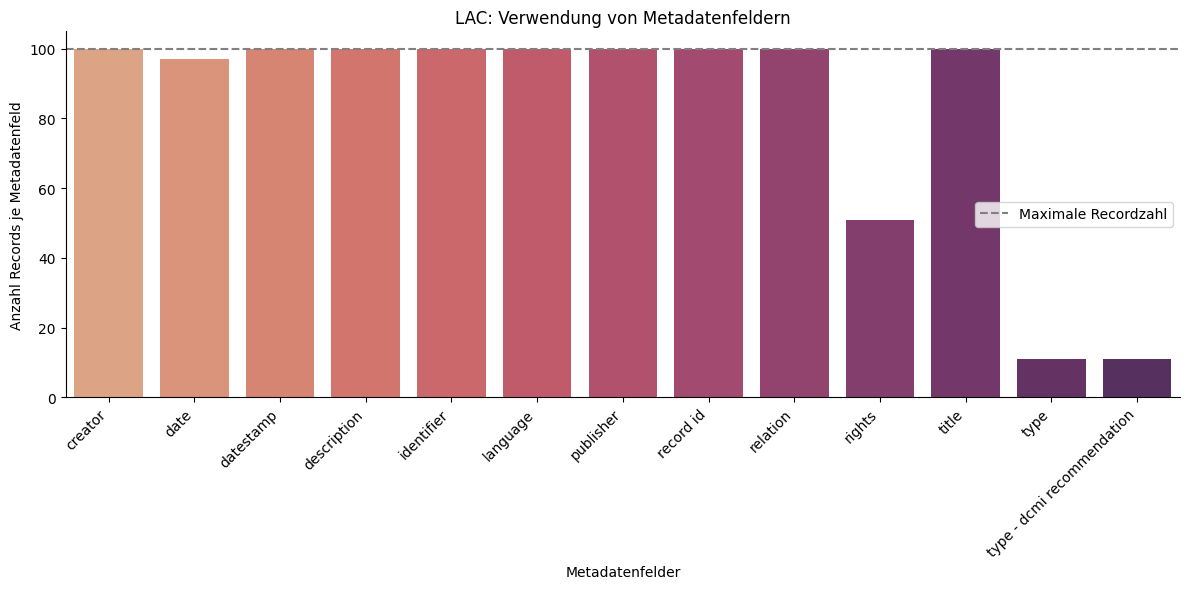

In [5]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_lac_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_lac_grouped[column][data_lac_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_lac_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette='flare')


# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('LAC: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("LAC_Verwendung_von_Metadatenfeldern.png", dpi=600)

plt.show()


In [2]:
data_lac.info() # Spaltennamen, Datentypen und fehlende Werte anzeigen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   datestamp                   100 non-null    datetime64[ns, UTC]
 1   relation                    644 non-null    object             
 2   creator                     125 non-null    object             
 3   language                    104 non-null    object             
 4   identifier                  100 non-null    object             
 5   title                       100 non-null    object             
 6   description                 100 non-null    object             
 7   date                        97 non-null     datetime64[ns, UTC]
 8   publisher                   100 non-null    object             
 9   rights                      51 non-null     object             
 10  type                        11 non-null     object            

In [3]:
data_lac.head() # Erste 5 Zeilen des Dataframes anzeigen

,datestamp,relation,creator,language,identifier,title,description,date,publisher,rights,type,type - dcmi recommendation
0,2020-02-05 15:15:01+00:00,hdl:11341/0000-0000-0000-3666,Alexander von Plato,deu,hdl:11341/0000-0000-0000-35D9,OH-Interview with Albert C.,Oral history Interview conducted 1981 by Alexa...,1981-09-23 00:00:00+00:00,LAC,NaN,NaN,NaN
1,NaT,hdl:11341/0000-0000-0000-3667,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,NaT,hdl:11341/0000-0000-0000-3668,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,NaT,hdl:11341/0000-0000-0000-3669,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
4,NaT,hdl:11341/0000-0000-0000-366A,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


In [4]:
data_lac.describe() # statistische Kennzahlen anzeigen

,datestamp,relation,creator,language,identifier,title,description,date,publisher,rights,type,type - dcmi recommendation
count,100,644,125,104,100,100,100,97,100,51,11,11
unique,NaN,644,38,17,100,100,84,NaN,2,5,1,1
top,NaN,hdl:11341/0000-0000-0000-3666,Issak Cheikh Oukafi,taq,hdl:11341/0000-0000-0000-35D9,OH-Interview with Albert C.,Recording by Asangba Reginald Taluah for Ph.D ...,NaN,LAC,CC BY,collection,collection
freq,NaN,1,22,22,1,1,6,NaN,99,20,11,11
mean,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2005-04-04 05:11:45.154639232+00:00,NaN,NaN,NaN,NaN
min,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1980-10-12 00:00:00+00:00,NaN,NaN,NaN,NaN
25%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,1991-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN
50%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2011-03-12 00:00:00+00:00,NaN,NaN,NaN,NaN
75%,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2015-05-01 00:00:00+00:00,NaN,NaN,NaN,NaN
max,2020-02-05 15:15:01+00:00,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN


In [5]:
sns.color_palette('flare', 12)

[(0.92277222, 0.61701365, 0.45971384),
 (0.91416896, 0.54052962, 0.41396347),
 (0.90157824, 0.46275577, 0.37697105),
 (0.88217931, 0.38923439, 0.35995244),
 (0.84696243, 0.31979068, 0.36806976),
 (0.79244362, 0.2695883, 0.39342447),
 (0.72585394, 0.24300672, 0.41669383),
 (0.65162696, 0.22317307, 0.4327001),
 (0.57860222, 0.20328034, 0.44122241),
 (0.50908361, 0.18613639, 0.4408295),
 (0.43469046, 0.17148074, 0.42859124),
 (0.36109117, 0.15646169, 0.40672362)]

In [6]:
flare_palette = sns.color_palette("flare", 12, as_cmap=False)
flare_hex = flare_palette.as_hex()
print(flare_hex)

['#eb9d75', '#e98a6a', '#e67660', '#e1635c', '#d8525e', '#ca4564', '#b93e6a', '#a6396e', '#943471', '#822f70', '#6f2c6d', '#5c2868']



<a id="2"></a>
## Univariate Plots

[Zurück zum Anfang](#0)



***Untersuchte Variablen:***

- creator
- language
- date
- publisher
- rights


<a id="2.1"></a>
### 2.1 Entstehungszeit der Ressourcen
[Zurück zum Anfang](#0)

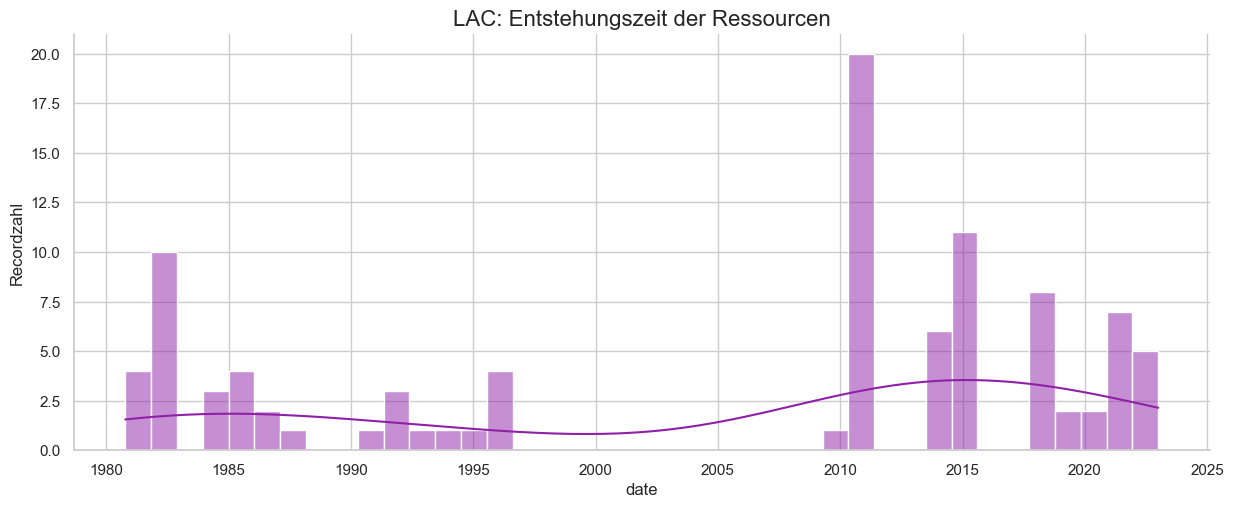

frühstes Datum: 1980-10-12 ; spätestes Datum: 2023-01-01


In [36]:

sns.set_style('whitegrid')
sns.displot(data_lac, x='date', bins=40, kde=True, color = '#9020a8', aspect=2.5) # Erscheinungszeitpunkt der Forschungsdaten anhand von 'date' in absolten Zahlen

#plt.xticks(rotation=45)
plt.title('LAC: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("HZSK_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühstes Datum:', data_lac['date'].min().date(), '; spätestes Datum:', data_lac['date'].max().date())


<a id="2.2"></a>
### 2.2 Verteilung der Urheberschaft (creator)

[Zurück zum Anfang](#0)

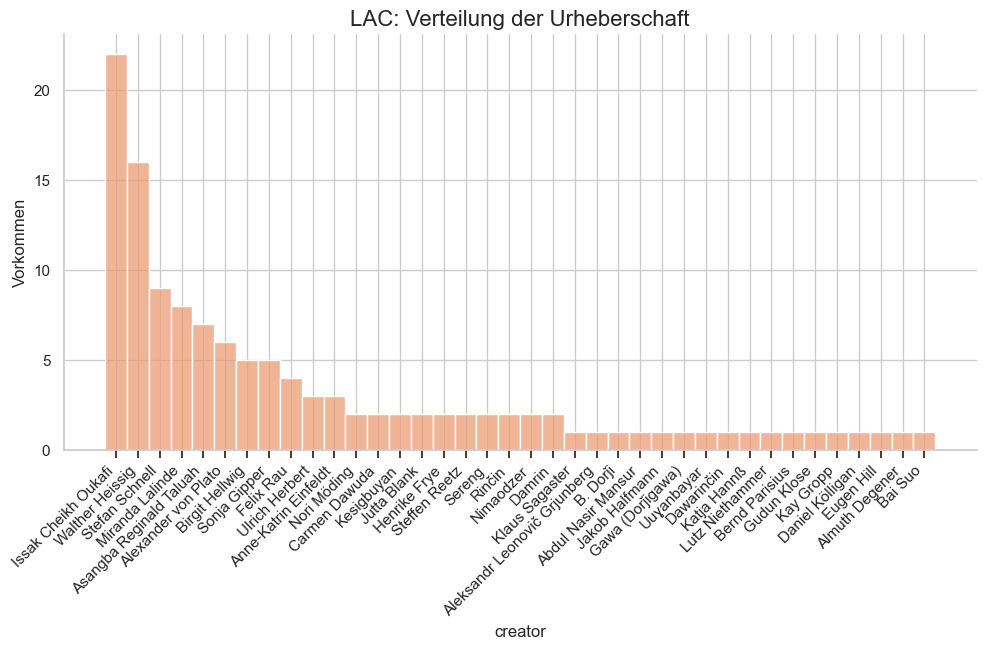

In [33]:
sns.set_theme() #Wiederherstellen der Defaulteinstellungen

order = data_lac['creator'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['creator'] = pd.Categorical(data_lac['creator'], categories=order, ordered=True)

#sns.set_style('whitegrid')
with sns.axes_style('whitegrid', {'xtick.bottom': True}):
    sns.displot(data_lac, x = 'creator', color='#eb9d75', aspect = 2)
plt.xticks(rotation=90)
plt.title('LAC: Verteilung der Urheberschaft', fontsize=16)
plt.xlabel('creator', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("LAC_Verteilung_creator_hist.png", dpi=600, bbox_inches='tight')
plt.show()


<a id="2.3"></a>
### 2.3 Sprachverteilung der Forschungsdaten

[Zurück zum Anfang](#0)

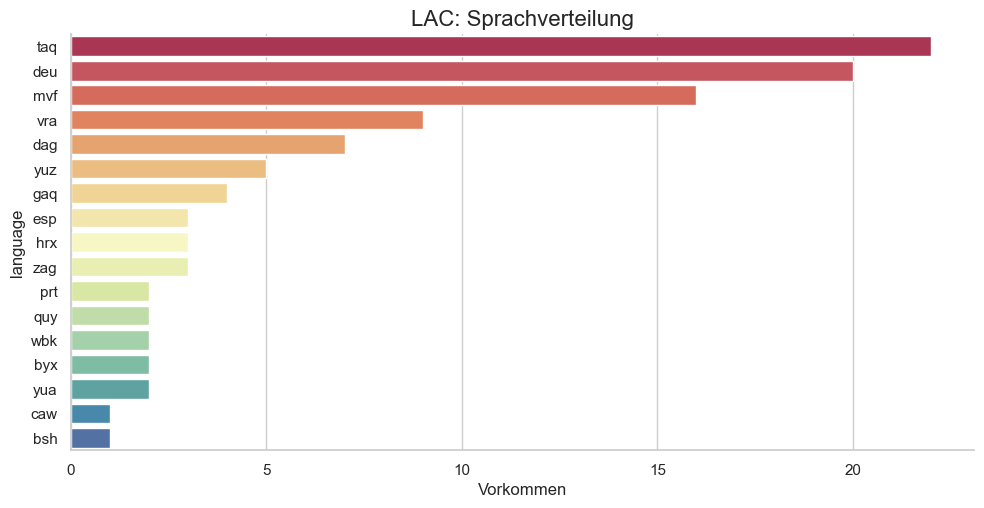

In [48]:
order = data_lac['language'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['language'] = pd.Categorical(data_lac['language'], categories=order, ordered=True)

sns.catplot(data = data_lac, y = 'language', kind = 'count', aspect = 2, hue = 'language', palette = 'Spectral', legend=False)

plt.title('LAC: Sprachverteilung', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('language', fontsize=12)
plt.savefig("LAC_language_bar.png", dpi=600, bbox_inches='tight')
plt.show()

### 2.4 Entstehungszeit der Forschungsdaten

[Zurück zum Anfang](#0)

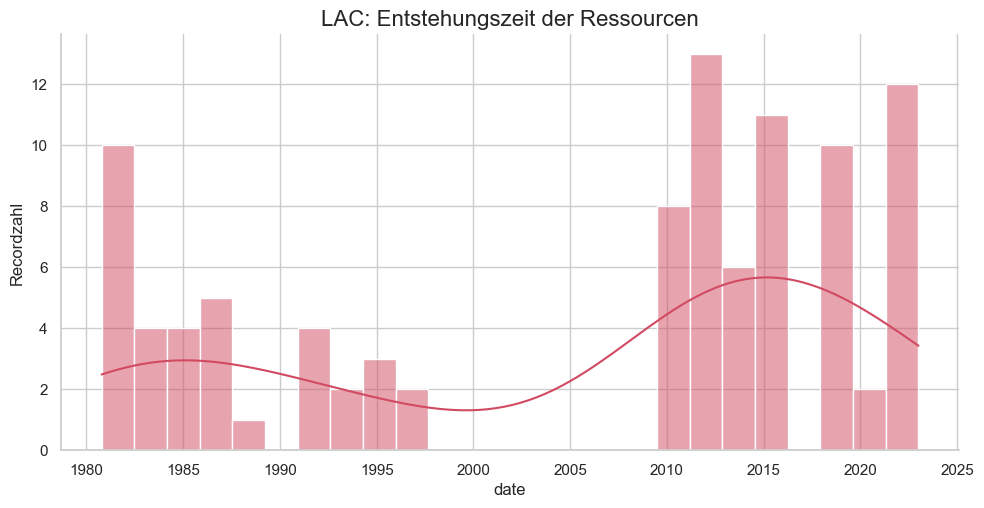

In [47]:
sns.set_theme(style='whitegrid') # seaborn-Design setzen
sns.displot(data_lac, x='date', bins=25, kde=True, color = '#d14a61', aspect=2) # Erscheinungszeitpunkt der Forschungsdaten in absolten Zahlen

plt.title('LAC: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("LAC_date_hist.png", dpi=600, bbox_inches='tight')
plt.show()


<a id="2.5"></a>
### 2.5 Verteilung der Publisher

[Zurück zum Anfang](#0)

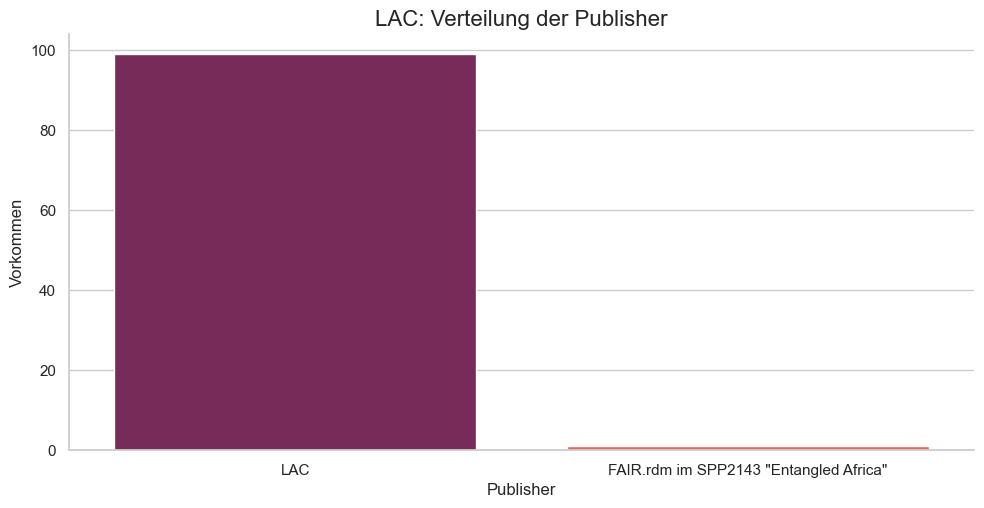

In [53]:
sns.catplot(data_lac, x = 'publisher', kind='count', aspect = 2, hue = "publisher", palette='rocket', legend=False)

plt.title('LAC: Verteilung der Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("LAC_publisher_cat.png", dpi=600, bbox_inches='tight')
plt.show()



<a id="2.6"></a>
### 2.6 Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

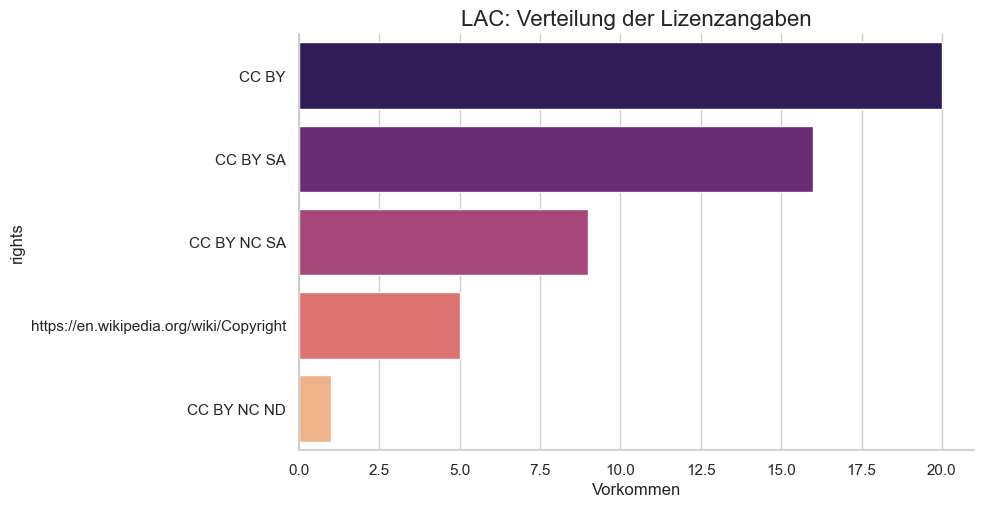

In [52]:
order = data_lac['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['rights'] = pd.Categorical(data_lac['rights'], categories=order, ordered=True)

sns.catplot(data_lac, y = 'rights', kind = 'count', aspect = 2, hue = 'rights', palette='magma', legend=False)

plt.title('LAC: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('rights', fontsize=12)
plt.savefig("LAC_rights_bar.png", dpi=600, bbox_inches='tight')
plt.show()



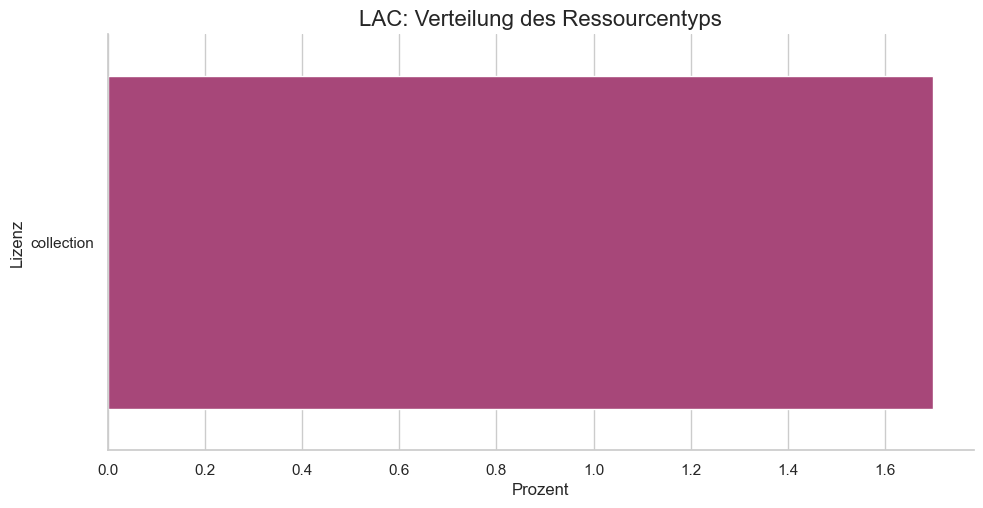

In [51]:
order = data_lac['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_lac['type'] = pd.Categorical(data_lac['type'], categories=order, ordered=True)

sns.catplot(data_lac, y = 'type', kind = 'count', aspect = 2, stat='percent', hue = 'type', palette='magma', legend=False)

plt.title('LAC: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Prozent', fontsize=12)
plt.ylabel('Lizenz', fontsize=12)
plt.show()



<a id="3"></a>
## 3 Word Clouds
[Zurück zum Anfang](#0)

- title
- description



<a id="3.1"></a>
### 3.1 Häufige Titelbegriffe

[Zurück zum Anfang](#0)

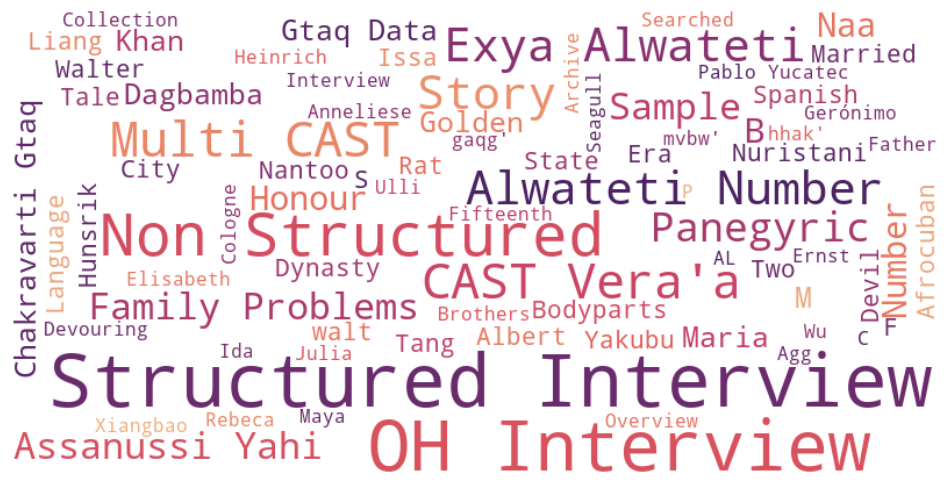

{'Structured Interview': 1.0, 'OH Interview': 0.9047619047619048, 'Non Structured': 0.6666666666666666, 'Multi CAST': 0.42857142857142855, "CAST Vera'a": 0.42857142857142855, 'Story': 0.38095238095238093, 'Exya Alwateti': 0.38095238095238093, 'Alwateti Number': 0.38095238095238093, 'Panegyric': 0.2857142857142857, 'Sample': 0.23809523809523808, 'Assanussi Yahi': 0.23809523809523808, 'Family Problems': 0.23809523809523808, 'B': 0.19047619047619047, 'Honour': 0.19047619047619047, 'Naa': 0.19047619047619047, 'Number': 0.19047619047619047, 'Golden': 0.14285714285714285, 'Khan': 0.14285714285714285, 'M': 0.14285714285714285, 'Dagbamba': 0.14285714285714285, 'Maria': 0.14285714285714285, 'Chakravarti Gtaq': 0.14285714285714285, 'Gtaq Data': 0.14285714285714285, 'Albert': 0.09523809523809523, 'Era': 0.09523809523809523, 'Rat': 0.09523809523809523, 'Devil': 0.09523809523809523, 'Yakubu': 0.09523809523809523, 'Nantoo': 0.09523809523809523, 'F': 0.09523809523809523, 'Two': 0.09523809523809523, '

In [39]:

# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_lac["title"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='flare', max_words=80).generate(text_data)


#Plotten mit matplotlib
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.savefig("LAC_title_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show()

print(wordcloud.words_)


<a id="3.2"></a>
### 3.2 Beschreibung der Resource

[Zurück zum Anfang](#0)

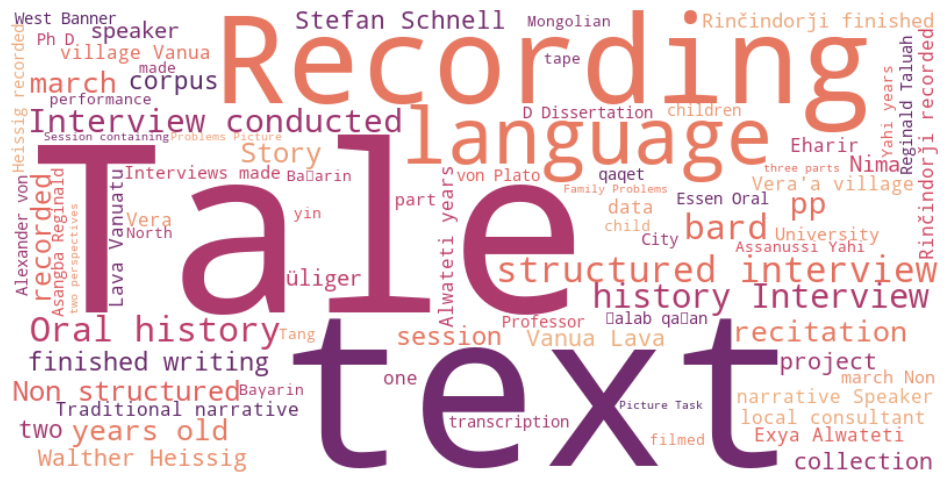

{'Tale': 1.0, 'text': 0.8421052631578947, 'Recording': 0.7894736842105263, 'language': 0.631578947368421, 'structured interview': 0.5526315789473685, 'bard': 0.5263157894736842, 'Oral history': 0.5263157894736842, 'history Interview': 0.5263157894736842, 'Interview conducted': 0.5, 'pp': 0.42105263157894735, 'recitation': 0.39473684210526316, 'march': 0.39473684210526316, 'years old': 0.39473684210526316, 'Story': 0.3684210526315789, 'Non structured': 0.3684210526315789, 'recorded': 0.34210526315789475, 'session': 0.3157894736842105, 'finished writing': 0.3157894736842105, 'two': 0.2894736842105263, 'corpus': 0.2894736842105263, 'Stefan Schnell': 0.2894736842105263, 'project': 0.2631578947368421, 'collection': 0.2631578947368421, 'Walther Heissig': 0.2631578947368421, 'Vanua Lava': 0.2631578947368421, 'Nima': 0.23684210526315788, 'speaker': 0.23684210526315788, 'üliger': 0.23684210526315788, 'Rinčindorǰi finished': 0.23684210526315788, 'Eharir': 0.21052631578947367, 'data': 0.210526315

In [37]:

# Textdaten für die Word Cloud aus Dataframe wählen
text_data = data_lac["description"].str.cat(sep=' ')

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=80, colormap='flare').generate(text_data)


'Plotten mit matplotlib'
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.savefig("LAC_description_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show()

print(wordcloud.words_)



<a id="4"></a>
## 4 Bi- und multivariate Plots
[Zurück zum Anfang](#0)

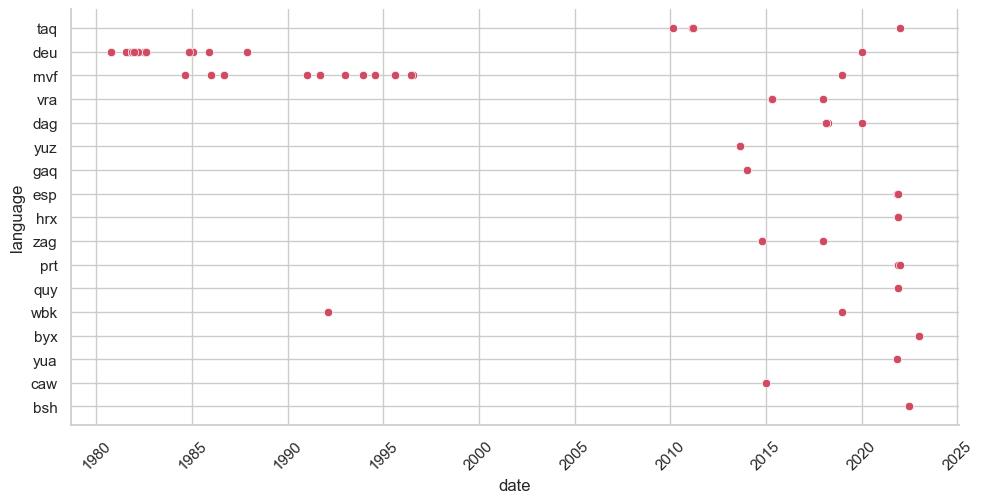

In [15]:
sns.relplot(data_lac, x='date', y='language', kind='scatter', aspect=2, color='#d14a61')
plt.xticks(rotation=45)
plt.show()